In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import itertools

In [2]:
red_df = pd.read_csv("../input/female-chilean-artist-network/Red_Artistas_Chile.csv", sep= ";")
red_df.fillna(0, inplace = True)
red_df.head()

,Nombre_Artista,Relacionado_1,Relacionado_2,Relacionado_3,Relacionado_4,Relacionado_5,Relacionado_6,Relacionado_7,Relacionado_8,Relacionado_9,Relacionado_10,Relacionado_11,Relacionado_12,Relacionado_13,Relacionado_14,Relacionado_15,Relacionado_16,Relacionado_17
0,Concepcion Balmes,Jose Balmes,Gracia Barrios,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,Nancy Gewolb,Rebeca Mayanz,0,0,0,Jose Balmes,Carlos Ortuzar,0,0,0,0,0,0,0,0,0,0,0.0
2,Janet Toro,0,0,0,0,Luis Lobo,0,0,Francisco Huneeus,0,0,0,0,0,0,0,0,0.0
3,Cecilia Vicuna,Carlos Lagarrigue,Carlos Vicuna,Rosa Vicuna,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,Laura Rodig,0,0,0,0,Virginio Arias,Fernando Alvarez,0,Pedro Felipe,0,0,0,0,0,0,0,0,0.0


In [3]:
# Obtenemos una lista de cada columna donde los valores son los nombres contenidos en cada columna
## Luego fusionamos las listas y buscamos los valores unicos
Nombres = [[value for value in red_df[column]] for column in red_df.columns]
Nombres_unidos = list(itertools.chain.from_iterable(Nombres))
# para conseguir lo valores unicos de manera más sencilla necesitamos pasar la lista a un numpy array y luego usar el metodo unique()
Nombres_array = np.array(Nombres_unidos)
Nombres_unicos = np.unique(Nombres_array)

In [4]:
# Eliminamos los ceros
Nombres_unicos = list(Nombres_unicos)
Nombres_unicos.remove("0")
Nombres_unicos.remove("0.0")

In [5]:
# Revisamos que efectivamente se eliminen los repetidos
len(Nombres_unicos) < len(Nombres_unidos)

True

In [6]:
rows = []
for i in range(len(red_df)):
    rows.append(red_df.loc[[i]].values.tolist())

In [7]:
rows_usefull = []
for i in range(len(rows)):
    rows_usefull.append(rows[i][0])   

In [8]:
Adya_list = []
for row in rows_usefull:
    for name in row:
        if name == row[0]:
            for name_2 in range(len(row)):
                if row[name_2] != 0:
                    Adya_list.append((name, row[name_2], 1))
                else:
                    continue
        else:
            continue

In [9]:
for tup in Adya_list:
    if tup[0] == tup[1]:
        Adya_list.remove(tup)

In [10]:
Red_adya = pd.DataFrame(index=Nombres_unicos, columns=Nombres_unicos,)
Red_adya.head()

,Aida Poblete,Alberto Blest,Alberto Perez,Alberto Valenzuela,Alejandro Wagner,Alexis Diaz,Alvaro Hoppe,Amunategui Aldunate,Ana Cortes,Antoine Bourdelle,...,Salvador Allende,Sara Malvar,Sergio Berthoud,Uwe Grumann,Vicente Huidobro,Violeta Parra,Virginia Huneeus,Virginio Arias,Ximena Armas,Ximena Cristi
Aida Poblete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alberto Blest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alberto Perez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alberto Valenzuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alejandro Wagner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for index in Red_adya.index:
    for column in Red_adya.columns:
        for tup in Adya_list:
            if (index,column) == (tup[0], tup[1]):
                Red_adya.loc[index,column] = 1
            else:
                continue

In [12]:
Red_adya.fillna(0, inplace = True)
Red_adya.head()

,Aida Poblete,Alberto Blest,Alberto Perez,Alberto Valenzuela,Alejandro Wagner,Alexis Diaz,Alvaro Hoppe,Amunategui Aldunate,Ana Cortes,Antoine Bourdelle,...,Salvador Allende,Sara Malvar,Sergio Berthoud,Uwe Grumann,Vicente Huidobro,Violeta Parra,Virginia Huneeus,Virginio Arias,Ximena Armas,Ximena Cristi
Aida Poblete,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alberto Blest,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alberto Perez,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alberto Valenzuela,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alejandro Wagner,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
##crear un objeto nx.graph
G = nx.Graph()
G.add_weighted_edges_from(Adya_list) #añadimos los nodos, los edges y los pesos a la grafica.

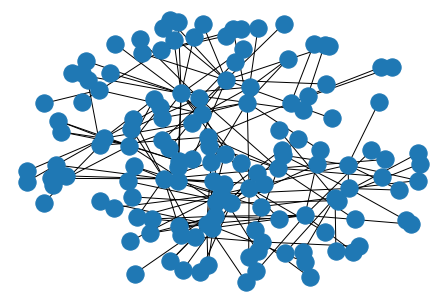

In [14]:
nx.draw(G, pos=nx.spring_layout(G, k=0.4))
plt.show()

(-1.1, 1.1)

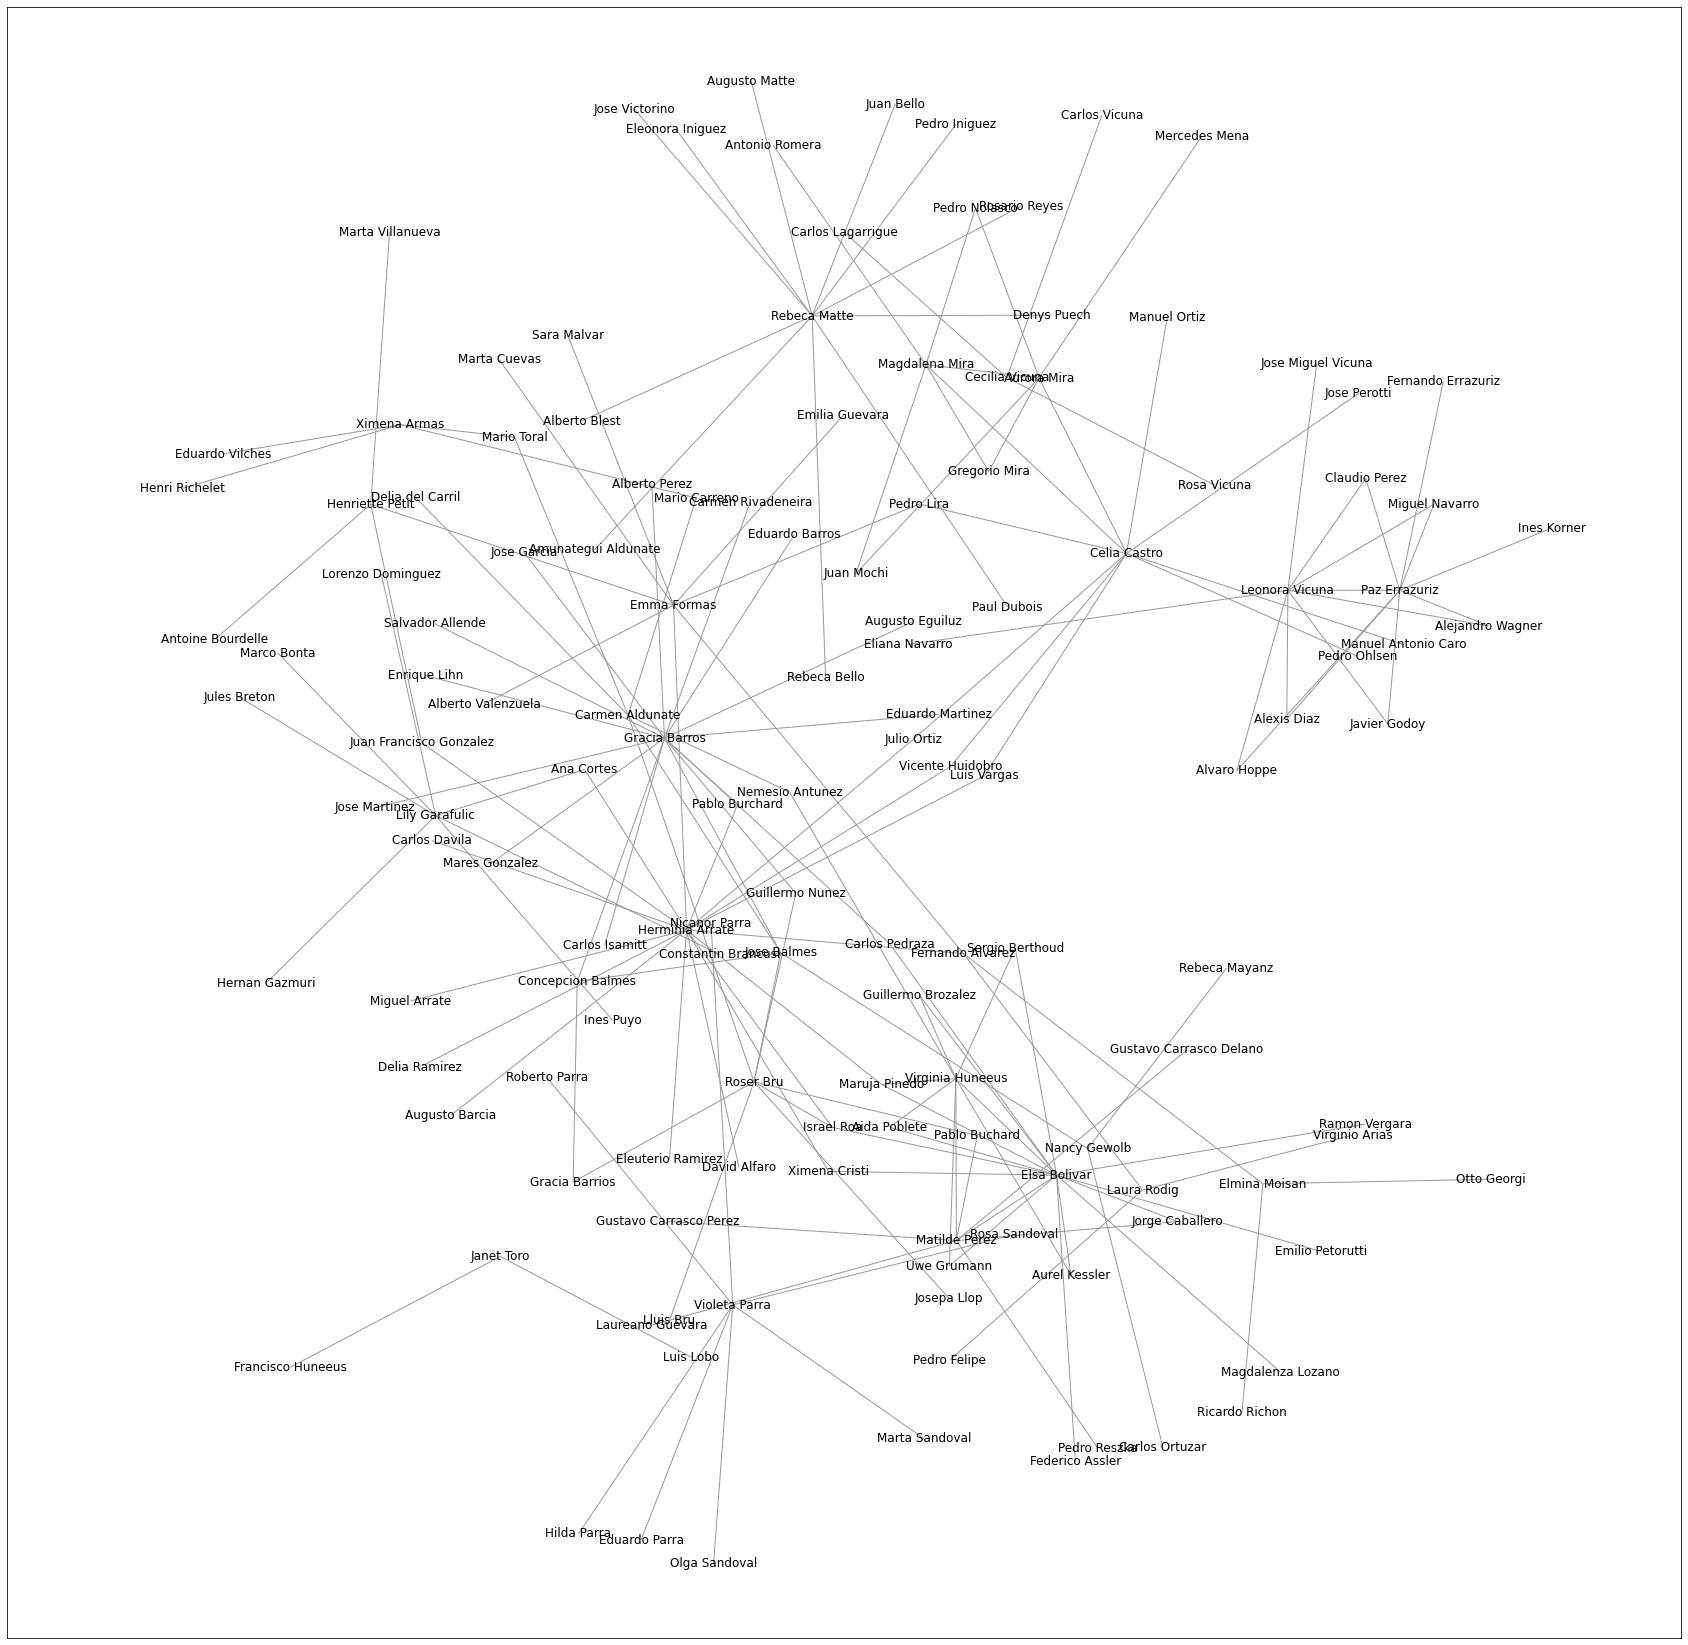

In [15]:
plt.figure(figsize=(30,30))
nx.draw_networkx(
    G, pos = nx.spring_layout(G, k=0.3), node_size=0, edge_color='#999999', with_labels=True)
# Add margin for labels
plt.xlim([-1.1, 1.1])

# STADISTICAS

### Global clustering: Using clustering to quantify interconnections between neighbors of neighbors

### Resilience: How properties such as density and minimum cut can quantify error and attack tolerance

### Inequality: Learning to measure the equality or inequality in network structures

### Global structure: Understanding the properties of whole networks

### Diameter and shortest paths: How to measure the size of a network

In [16]:
nx.average_clustering(G)


0.1252413195494025

In [17]:
dict1=nx.degree_centrality(G)
dict1

sorted_dict = {}
sorted_keys = sorted(dict1, key=dict1.get)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = dict1[w]
    
sorted_dict

{'Rebeca Mayanz': 0.007246376811594203,
 'Carlos Ortuzar': 0.007246376811594203,
 'Luis Lobo': 0.007246376811594203,
 'Francisco Huneeus': 0.007246376811594203,
 'Carlos Lagarrigue': 0.007246376811594203,
 'Carlos Vicuna': 0.007246376811594203,
 'Rosa Vicuna': 0.007246376811594203,
 'Virginio Arias': 0.007246376811594203,
 'Pedro Felipe': 0.007246376811594203,
 'Fernando Errazuriz': 0.007246376811594203,
 'Ines Korner': 0.007246376811594203,
 'Jose Miguel Vicuna': 0.007246376811594203,
 'Eliana Navarro': 0.007246376811594203,
 'Nicanor Parra': 0.007246376811594203,
 'Rosa Sandoval': 0.007246376811594203,
 'Marta Sandoval': 0.007246376811594203,
 'Olga Sandoval': 0.007246376811594203,
 'Hilda Parra': 0.007246376811594203,
 'Eduardo Parra': 0.007246376811594203,
 'Roberto Parra': 0.007246376811594203,
 'Ramon Vergara': 0.007246376811594203,
 'Magdalenza Lozano': 0.007246376811594203,
 'Federico Assler': 0.007246376811594203,
 'Emilio Petorutti': 0.007246376811594203,
 'Miguel Arrate': 0.